In [7]:
from slab import *
from matplotlib import pyplot as plt
from slab import dsfit
from slab import dataanalysis
from slab.datamanagement import SlabFile
from numpy import *
import csv
%matplotlib inline
%config InlineBackend.figure_format='retina'

data_dir = r'S:\_Data\160503 - LNF amp RT calibration'
exp_dir = r'S:\_Data\160301 - M016 EonHe\experiment'
nbfig_dir = r'C:\Users\slab\Google Drive\grad school\schuster lab\Analysis\IPython Notebooks\Figures'

sys.path.append(exp_dir)
sys.path.append(r'C:\Users\slab\Google Drive\grad school\schuster lab')
from data_cache import dataCacheProxy
from Analysis.Modules import common, fit, anal

In [21]:
fn1 = r'short_B1_to_B5.csv'
fn2 = r'B1_to_212A.csv'
fn3 = r'B1_to_240A.csv'
fn4 = r'B1_to_249A.csv'
fn5 = r'B1_to_667B.csv'

In [22]:
wid_data = 3

def load_data(datafile, len_data=1600):

    with open(datafile, 'rb') as f:
        reader = csv.reader(f)
        for idx,row in enumerate(reader):
            if idx == 0:
                data = np.zeros([len_data,wid_data])

            try:
                for k in range(wid_data):
                    data[idx,k] = float(row[k])
            except: 
                pass

    return data 

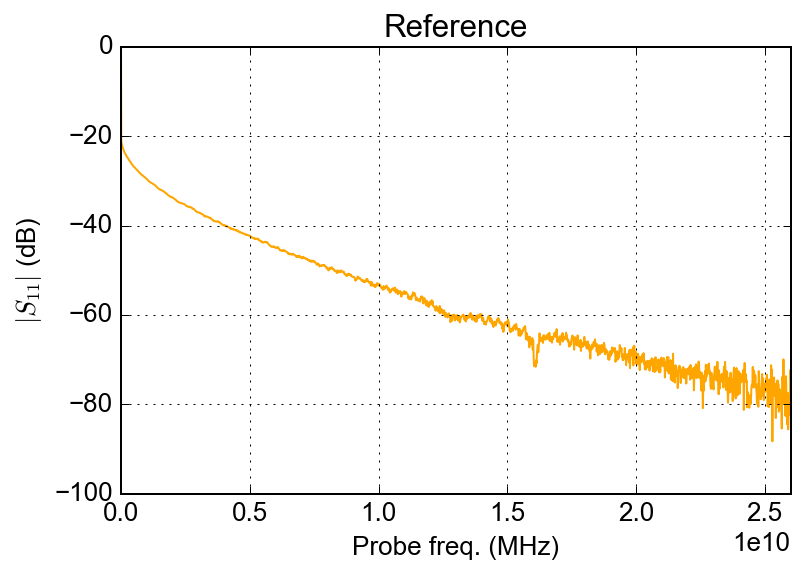

In [23]:
reload(dsfit)
f = load_data(os.path.join(data_dir, fn1))[3:]

fig1 = plt.figure(figsize = (6.,4.))
common.configure_axes(13)
plt.title('Reference')
plt.plot(f[:,0], f[:,1], color = 'orange', label='')

plt.xlim(0E9, 26E9)
#plt.ylim(-120, -60)
plt.xlabel('Probe freq. (MHz)')
plt.ylabel('$|S_{11}|$ (dB)')
plt.legend(fancybox = True , shadow=True, loc=0)
plt.grid()
plt.show()

In [24]:
d1 = load_data(os.path.join(data_dir, fn2))[3:]
d2 = load_data(os.path.join(data_dir, fn3))[3:]
d3 = load_data(os.path.join(data_dir, fn4))[3:]
d4 = load_data(os.path.join(data_dir, fn5))[3:]

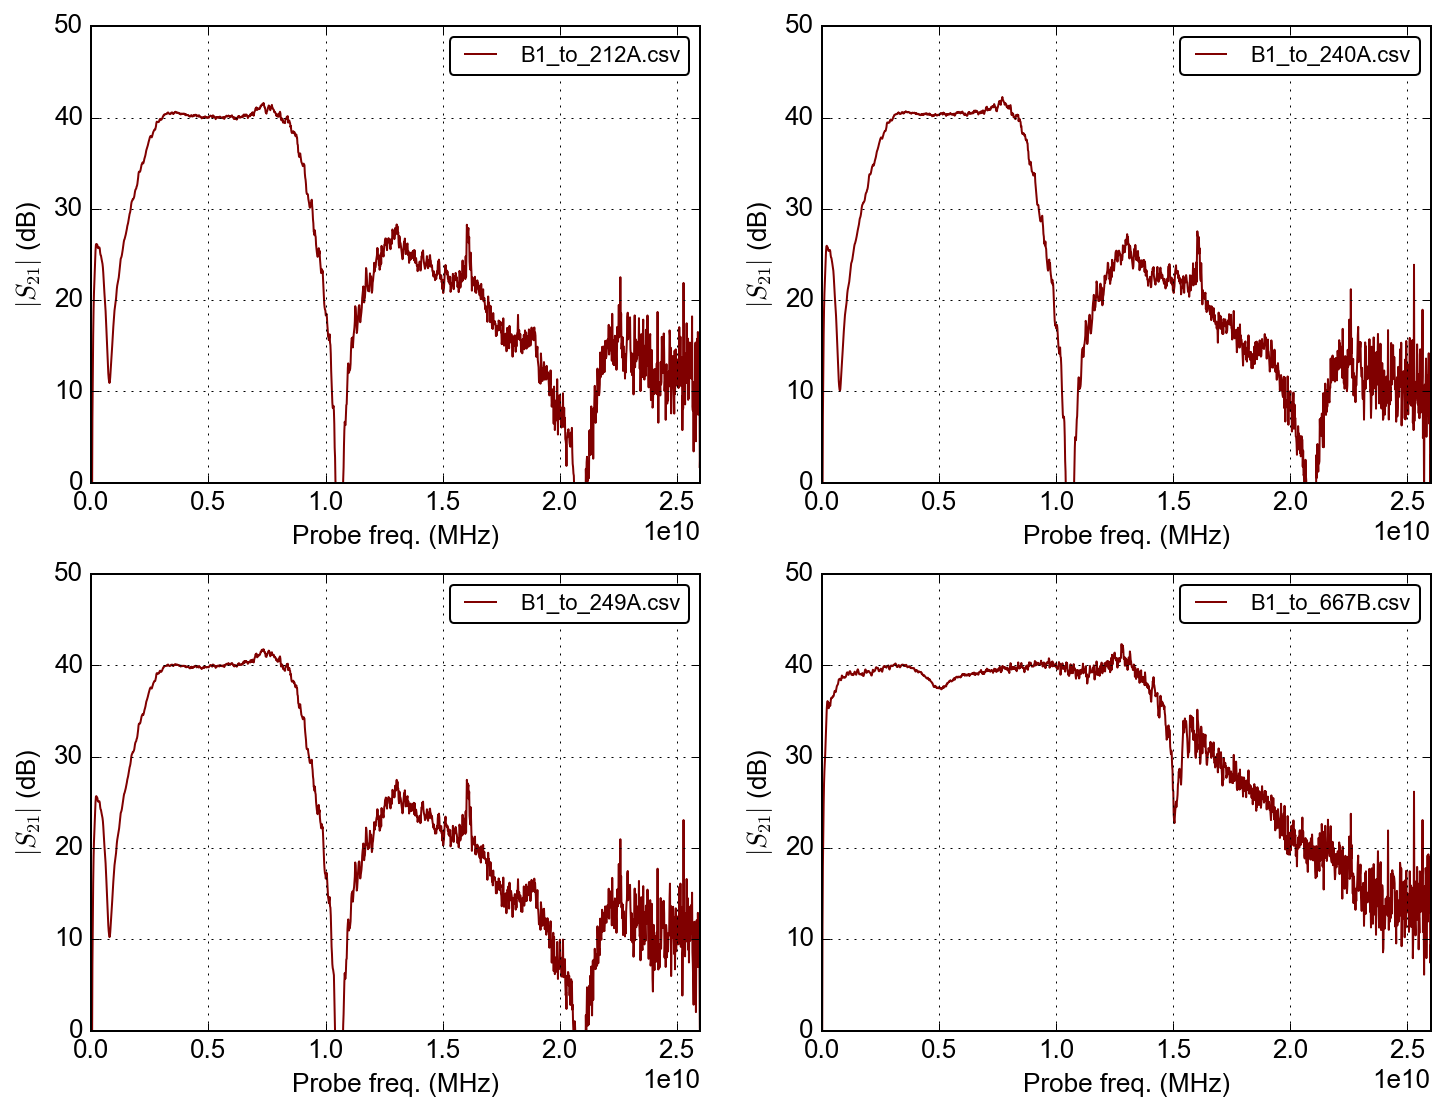

In [42]:
fig1 = plt.figure(figsize = (12.,9.))
common.configure_axes(13)

for k, fn in enumerate([fn2, fn3, fn4, fn5]):
    dn = load_data(os.path.join(data_dir, fn))[3:]
    plt.subplot('22%d'%(k+1))
    plt.plot(dn[:,0], dn[:,1]-f[:,1], color = 'maroon', label=fn)

    plt.xlim(0E9, 26E9)
    plt.ylim(0, 50)
    plt.xlabel('Probe freq. (MHz)')
    plt.ylabel('$|S_{21}|$ (dB)')
    plt.legend(fancybox = True , shadow=False, loc=1, prop={'size':11})
    plt.grid()

### With Hittite switch concatenated

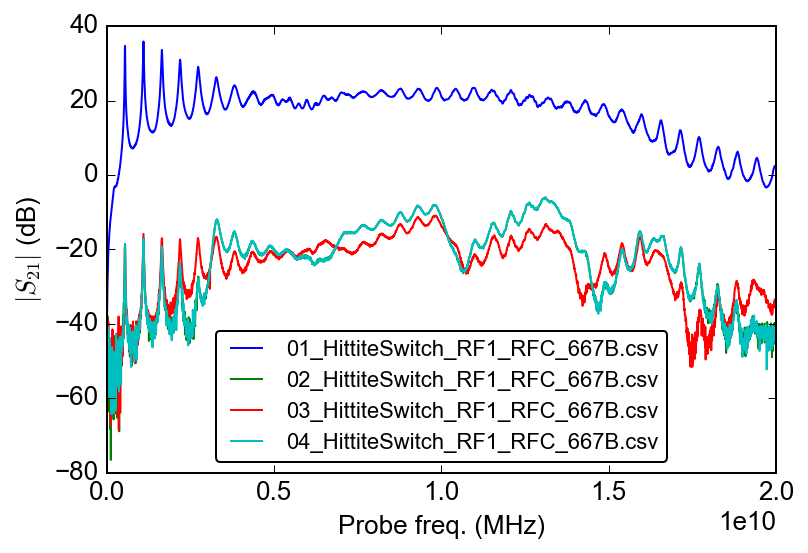

In [49]:
gn2 = r'01_HittiteSwitch_RF1_RFC_667B.csv'
gn3 = r'02_HittiteSwitch_RF1_RFC_667B.csv'
gn4 = r'03_HittiteSwitch_RF1_RFC_667B.csv'
gn5 = r'04_HittiteSwitch_RF1_RFC_667B.csv'

fig1 = plt.figure(figsize = (6.,4.))
common.configure_axes(13)

for k, fn in enumerate([gn2, gn3, gn4, gn5]):
    dn = load_data(os.path.join(data_dir, fn), len_data=3200)[3:]
    #plt.subplot('22%d'%(k+1))
    plt.plot(dn[:,0], dn[:,1], label=fn)

    plt.xlim(0E9, 20E9)
    #plt.ylim(0, 50)
    plt.xlabel('Probe freq. (MHz)')
    plt.ylabel('$|S_{21}|$ (dB)')
    plt.legend(fancybox = True , shadow=False, loc=0, prop={'size':11})
    plt.grid()

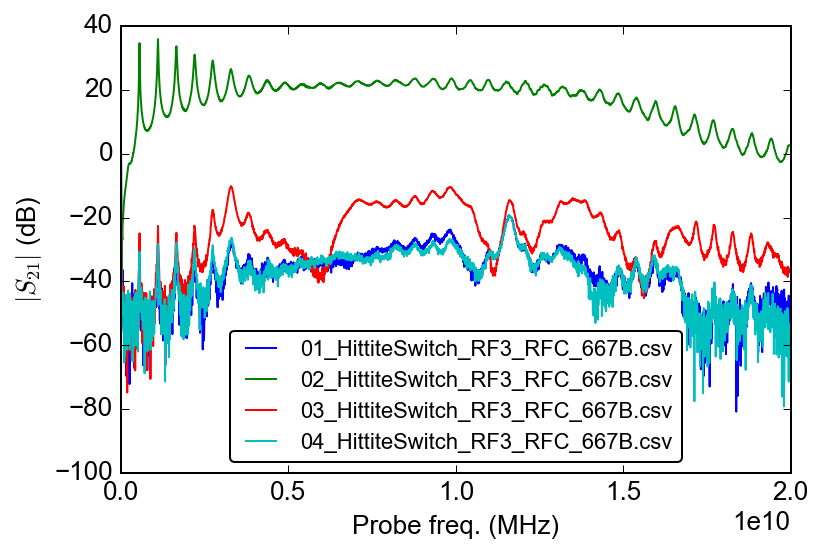

In [51]:
gn2 = r'01_HittiteSwitch_RF3_RFC_667B.csv'
gn3 = r'02_HittiteSwitch_RF3_RFC_667B.csv'
gn4 = r'03_HittiteSwitch_RF3_RFC_667B.csv'
gn5 = r'04_HittiteSwitch_RF3_RFC_667B.csv'

fig1 = plt.figure(figsize = (6.,4.))
common.configure_axes(13)

for k, fn in enumerate([gn2, gn3, gn4, gn5]):
    dn = load_data(os.path.join(data_dir, fn), len_data=3200)[3:]
    #plt.subplot('22%d'%(k+1))
    plt.plot(dn[:,0], dn[:,1], label=fn)

    plt.xlim(0E9, 20E9)
    #plt.ylim(0, 50)
    plt.xlabel('Probe freq. (MHz)')
    plt.ylabel('$|S_{21}|$ (dB)')
    plt.legend(fancybox = True , shadow=False, loc=0, prop={'size':11})
    plt.grid()

### Box modes 

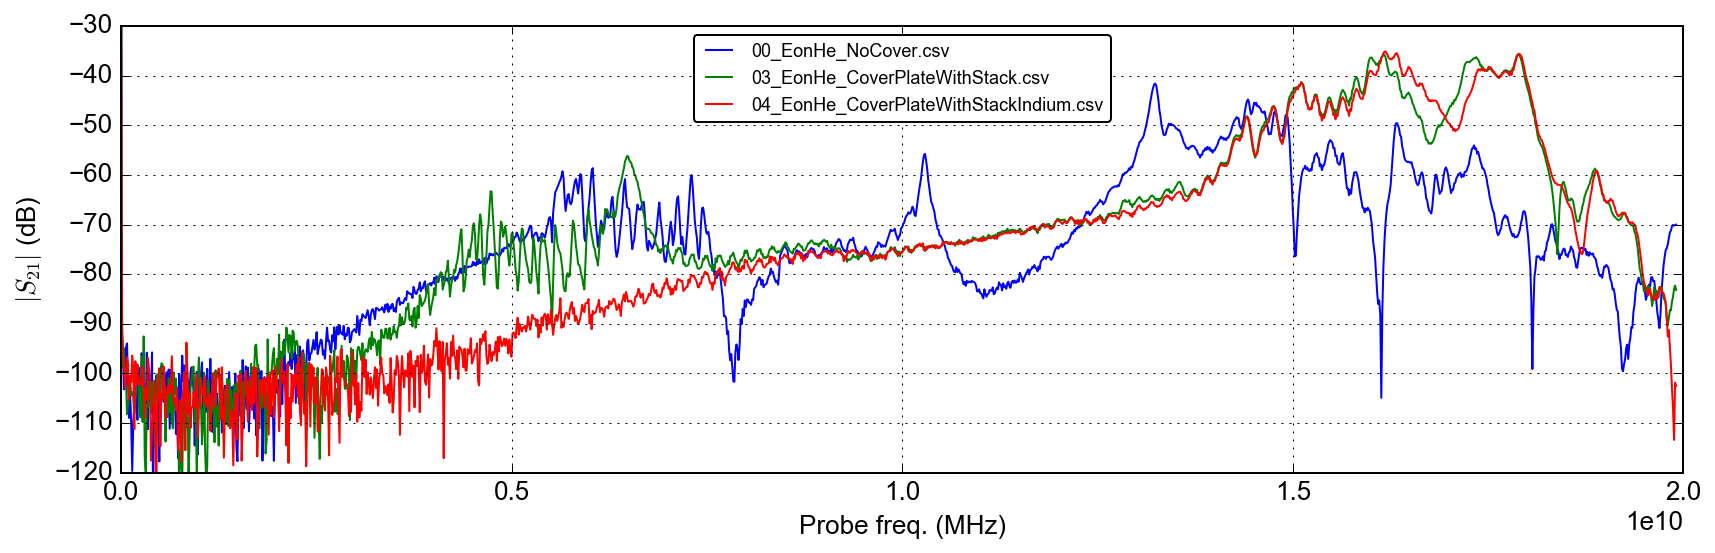

In [62]:
dfolder = r'S:\_Data\160512 - Box Mode improvements'

fn1 = r'00_EonHe_NoCover.csv'
fn2 = r'01_EonHe_CoverPlateWithHole.csv'
fn3 = r'02_EonHe_CoverPlateWithHoleCoveredWithTape.csv'
fn4 = r'03_EonHe_CoverPlateWithStack.csv'
fn5 = r'04_EonHe_CoverPlateWithStackIndium.csv'

fig1 = plt.figure(figsize = (14.,4.))
common.configure_axes(13)

for k, fn in enumerate([fn1, fn4, fn5]):
    dn = load_data(os.path.join(dfolder, fn), len_data=1500)[3:]
    #plt.subplot('22%d'%(k+1))
    plt.plot(dn[:,0], dn[:,1], label=fn)

plt.xlim(0E9, 20E9)
plt.ylim(-120, -30)
plt.xlabel('Probe freq. (MHz)')
plt.ylabel('$|S_{21}|$ (dB)')
plt.legend(fancybox = True , shadow=False, loc=0, prop={'size':9})
plt.grid()